about data: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets

In [2]:
# age - client's age in years (numeric)
# job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
# marital - marital status (categorical: divorced, married, single, unknown)
# education - client's education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
# default - has credit in default? (categorical: no, yes, unknown)
# housing - has housing loan? (categorical: no, yes, unknown)
# loan - has personal loan? (categorical: no, yes, unknown)
# contact - contact communication type (categorical: cellular, telephone)
# month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)
# day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)
# duration - last contact duration, in seconds (numeric).
# campaign - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
# pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
# previous - number of contacts performed for this client before this campaign (numeric)
# poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)
# emp.var.rate - employment variation rate, quarterly indicator (numeric)
# cons.price.idx - consumer price index, monthly indicator (numeric)
# cons.conf.idx - consumer confidence index, monthly indicator (numeric)
# euribor3m - euribor 3 month rate, daily indicator (numeric)
# nr.employed - number of employees, quarterly indicator (numeric)
# Output feature (desired target):

# y - has the client subscribed a term deposit? (binary: yes,no)

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('banking.csv')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [6]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [10]:
df.duplicated().sum()

12

In [11]:
df.drop_duplicates(inplace=True)# by default keep='first'

In [12]:
df.shape

(41176, 21)

In [13]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [14]:
df['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [15]:
# cheak class impalance
df['y'].value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

Text(0.5, 1.0, 'target variable')

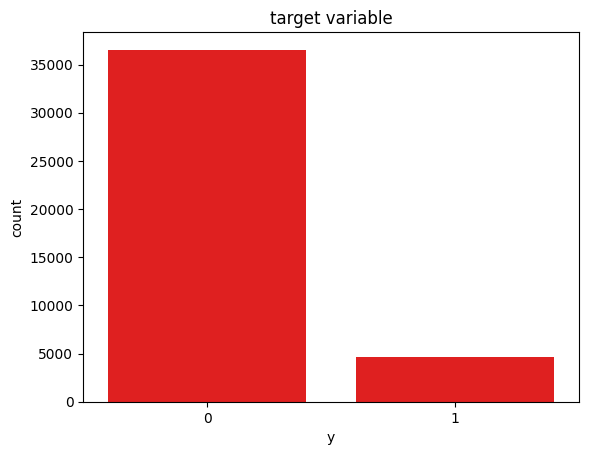

In [16]:
sns.countplot(x='y', data=df, color='r', stat='count')  # by default state='count
plt.title('target variable')

In [17]:
# target in percentage
df['y'].value_counts()/len(df)*100

y
0    88.733728
1    11.266272
Name: count, dtype: float64

Text(0.5, 1.0, 'target variable')

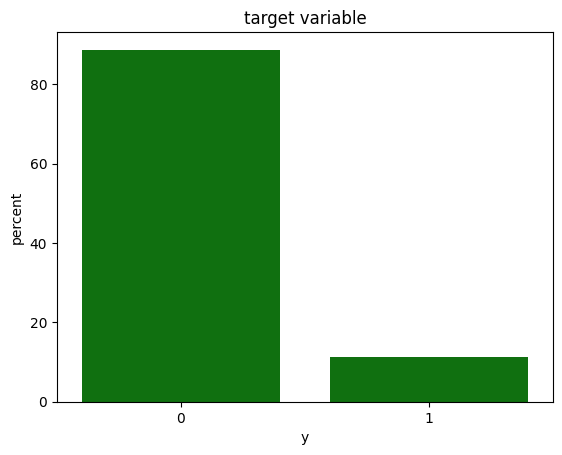

In [18]:
sns.countplot(x='y', data=df, color='g', stat='percent')  # by default state='count
plt.title('target variable')

The class distribution in the target variable is ~89:11 indicating an imbalance dataset

In [19]:
# EDA
# univariate analysis of categorical features: 

<Axes: xlabel='marital'>

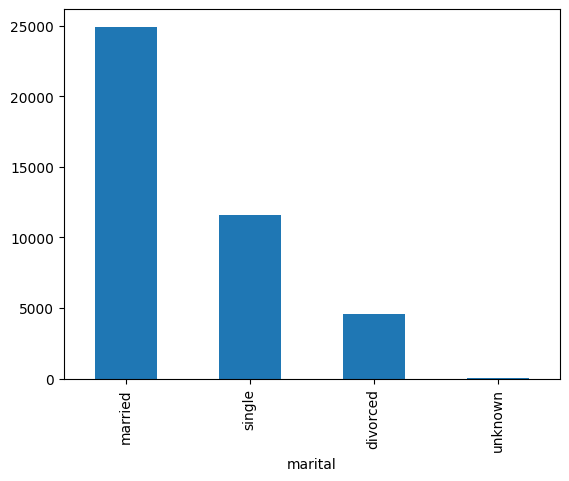

In [20]:
df['marital'].value_counts().plot(kind='bar')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp_var_rate    41176 non-null  float64
 16  cons_price_idx  41176 non-null  float64
 17  cons_conf_idx   41176 non-null  floa

In [22]:
df.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,high.school,unknown,no,yes,telephone,jun,thu,nonexistent
41184,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,nonexistent
41185,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,nonexistent
41186,technician,married,professional.course,no,no,yes,telephone,oct,tue,nonexistent


In [23]:
cat_features=df.select_dtypes(include='object').columns

In [24]:
cat_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

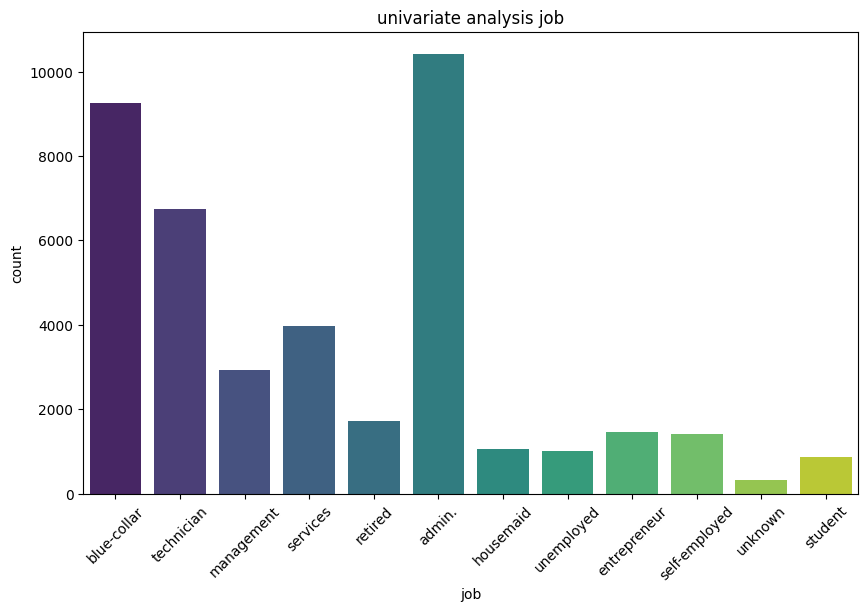

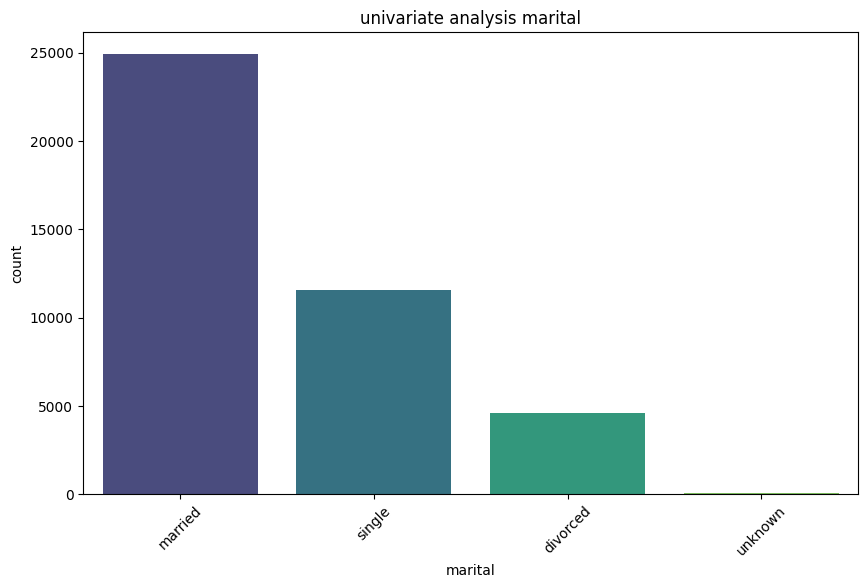

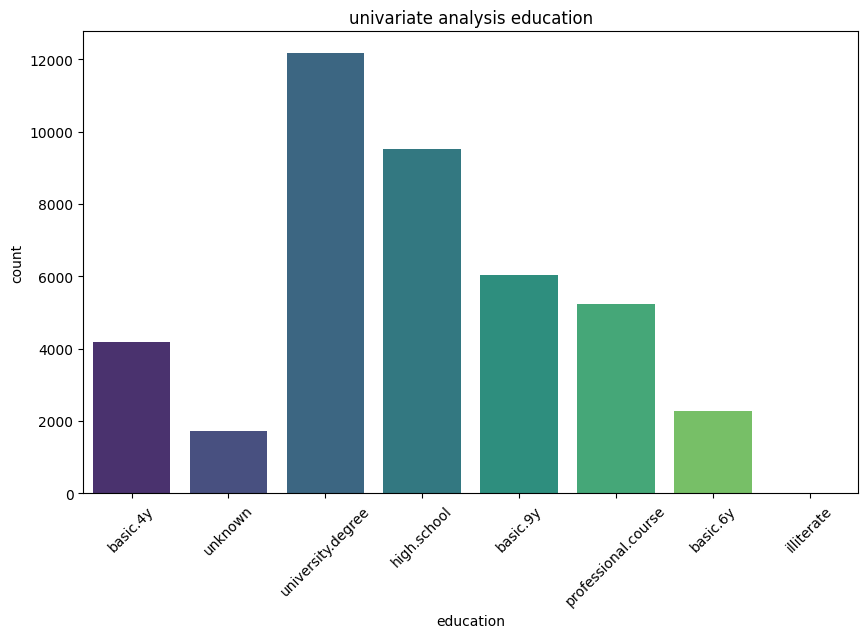

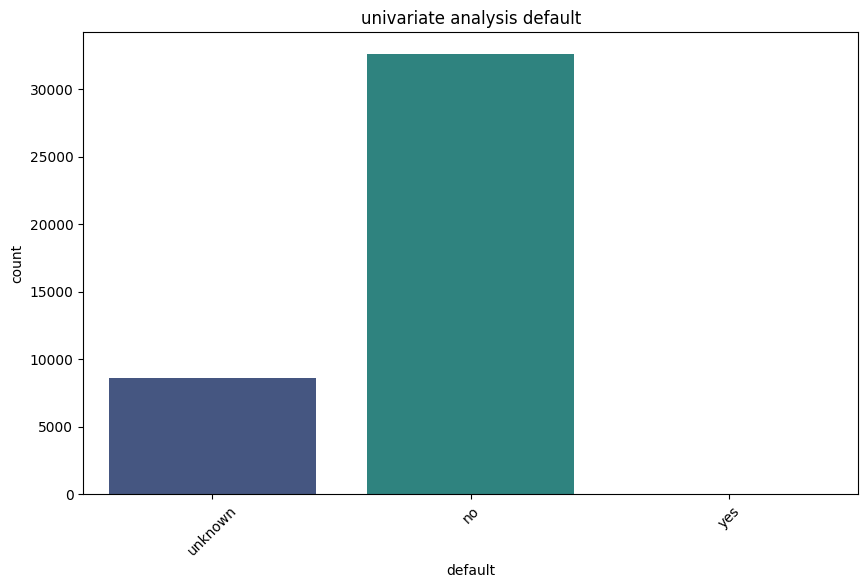

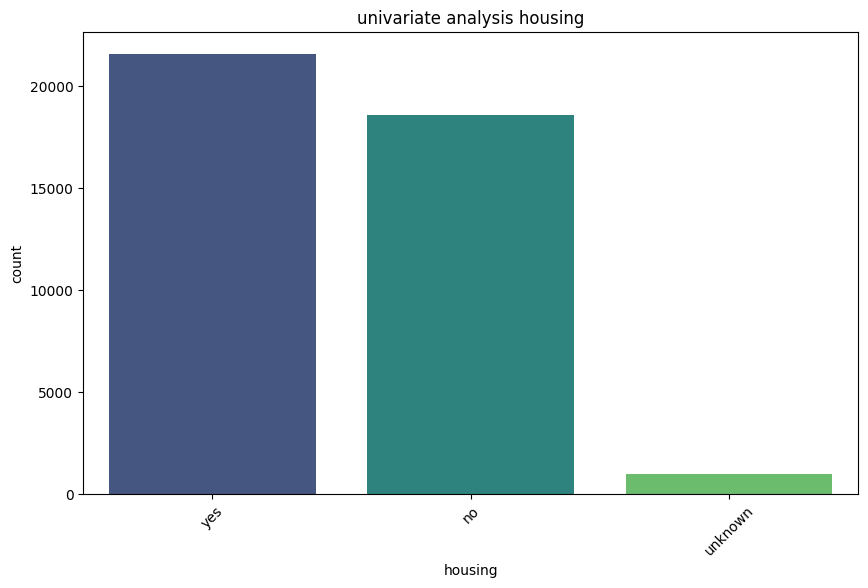

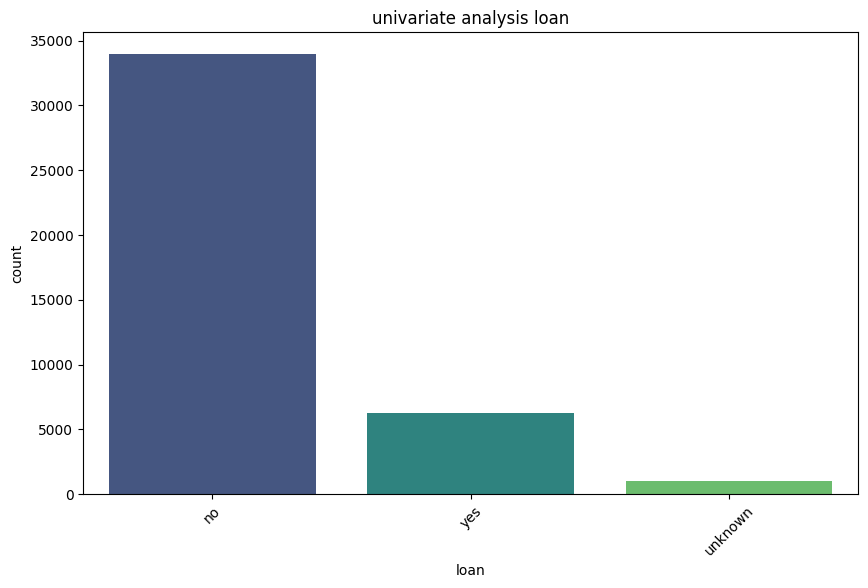

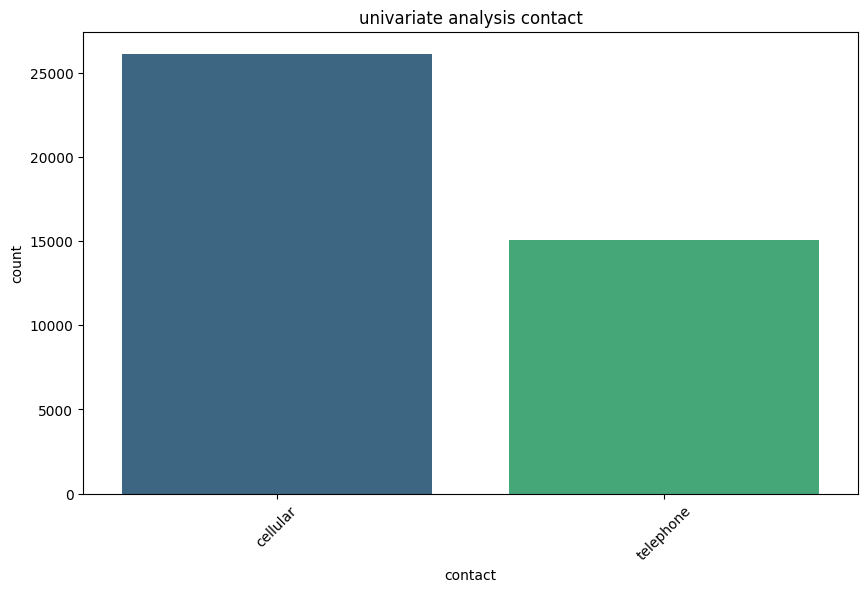

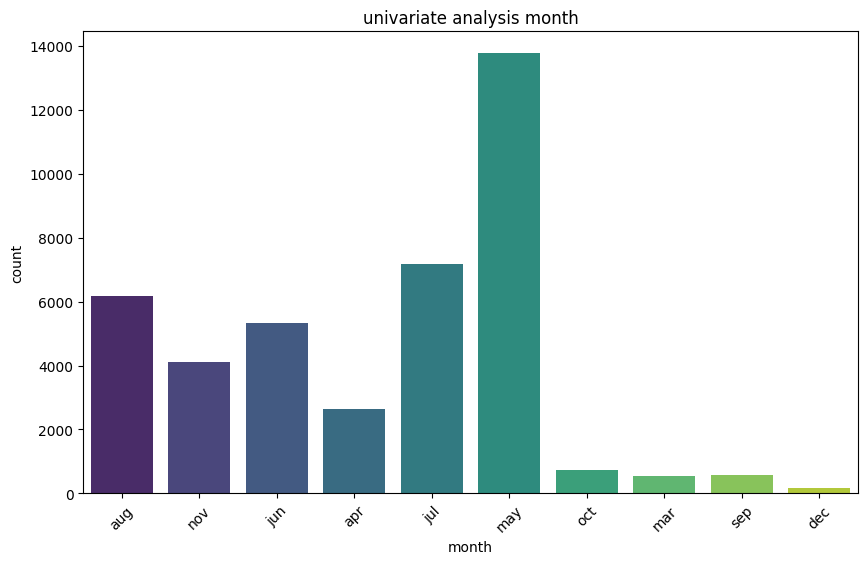

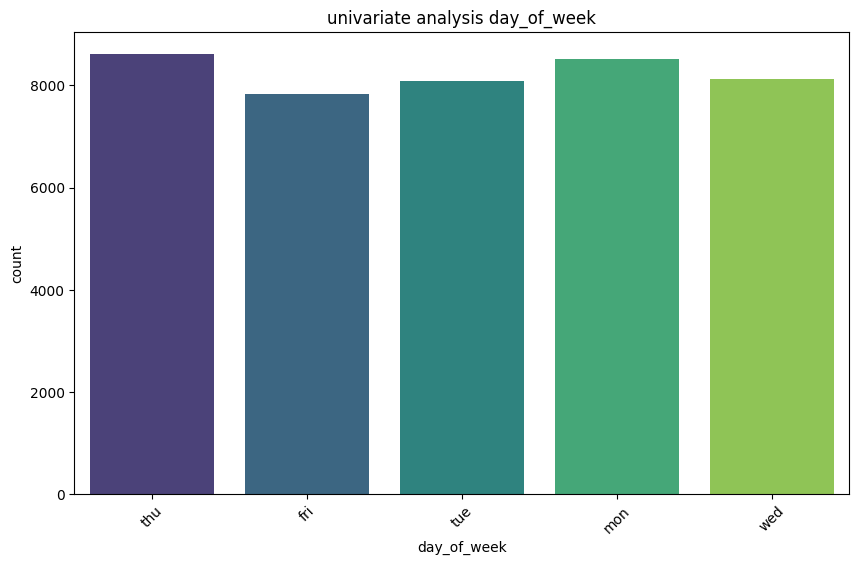

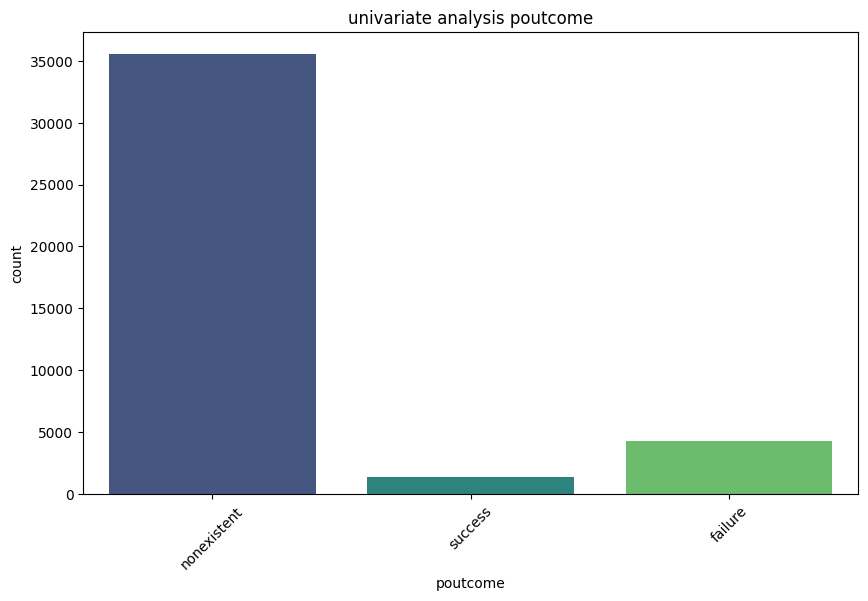

In [25]:
for col in cat_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col,data=df,palette='viridis')
    plt.title(f"univariate analysis {col}")
    plt.xticks(rotation=45)
    plt.show()

In [26]:
# Observations :¶
# The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.
# A huge number of the customers are married.
# Majority of the customers do not have a credit in default
# Many of our past customers have applied for a housing loan but very few have applied for personal loans.
# Cell-phones seem to be the most favoured method of reaching out to customers.
# Many customers have been contacted in the month of May.
# The plot for the target variable shows heavy imbalance in the target variable.

In [27]:
df['marital'].value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [28]:
df[df['marital']=='unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
206,52,services,unknown,professional.course,no,yes,no,telephone,jun,fri,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
228,30,technician,unknown,university.degree,no,no,no,cellular,oct,fri,...,2,16,1,success,-1.1,94.601,-49.5,0.942,4963.6,0
2188,58,management,unknown,university.degree,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3284,32,unknown,unknown,university.degree,no,no,no,telephone,jun,thu,...,7,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
3751,31,entrepreneur,unknown,university.degree,no,yes,no,telephone,oct,thu,...,4,999,1,failure,-3.4,92.431,-26.9,0.722,5017.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36975,34,admin.,unknown,university.degree,no,no,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
38147,66,retired,unknown,basic.9y,no,yes,no,cellular,aug,wed,...,2,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,0
38897,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,...,2,11,2,success,-1.8,93.369,-34.8,0.639,5008.7,1
39237,29,admin.,unknown,professional.course,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8,0


In [29]:
#The missing values in some columns have been represented as unknown. unknown represents missing data.
# we can replace with the mode

In [30]:
df['marital'].mode()

0    married
Name: marital, dtype: object

In [31]:
df['marital'].mode()[0]

'married'

In [32]:
df['marital']=df['marital'].replace('unknown',df['marital'].mode()[0] )

In [33]:
df['marital'].value_counts()

marital
married     25001
single      11564
divorced     4611
Name: count, dtype: int64

In [34]:
# General code: 
for col in cat_features: 
    mode=df[col].mode()[0]
    df[col]=df[col].replace('unknown', mode)

In [35]:
df['loan'].value_counts()

loan
no     34928
yes     6248
Name: count, dtype: int64

In [36]:
# Univariate analysis of Numerical columns
df.select_dtypes(include=np.number)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,0


In [37]:

num_features=df.select_dtypes(include=np.number).columns

In [38]:
num_features

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

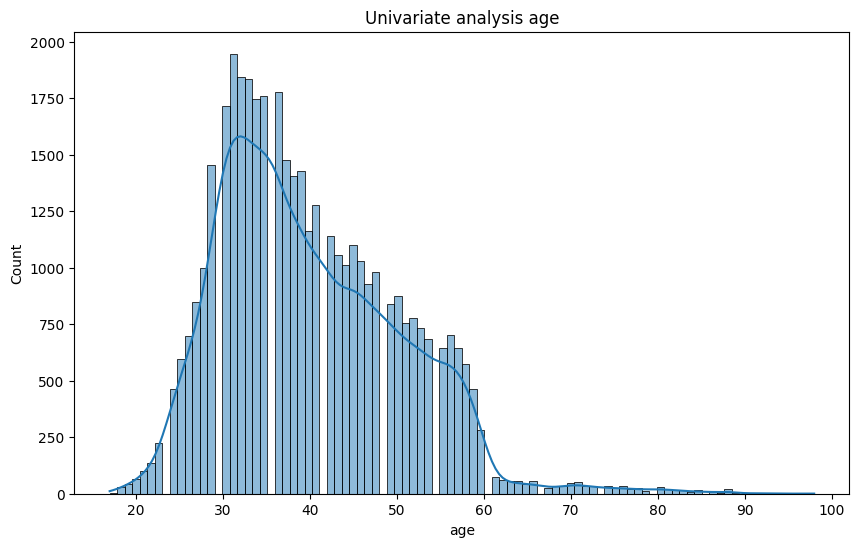

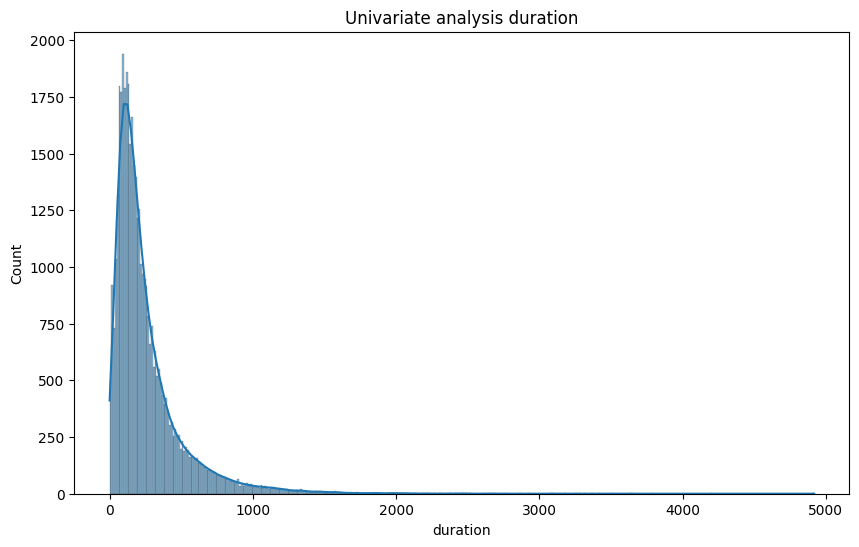

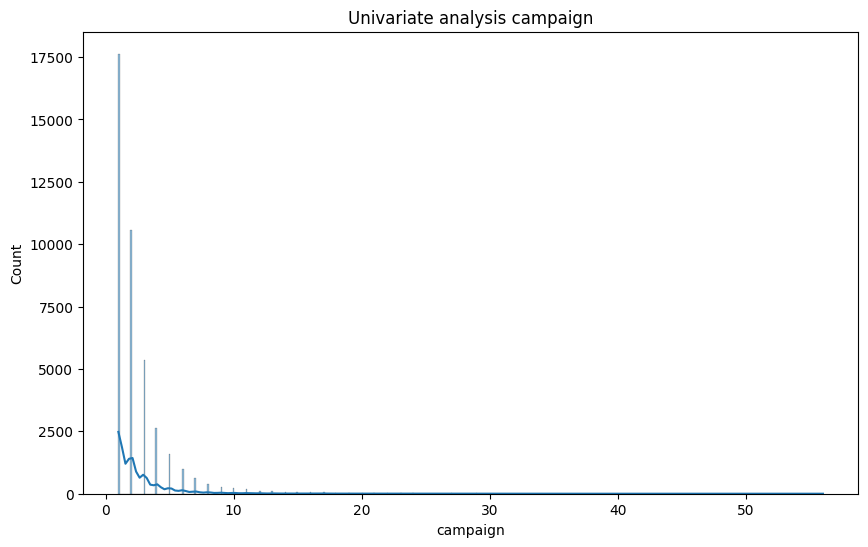

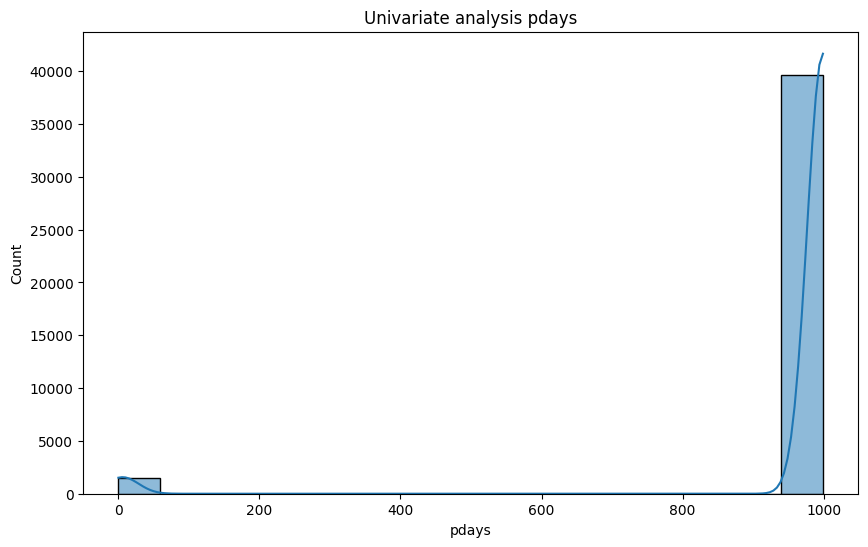

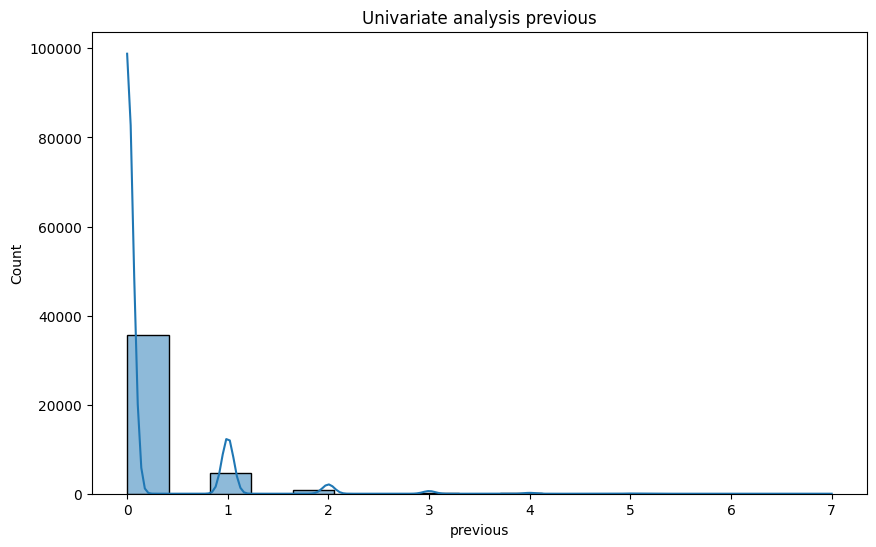

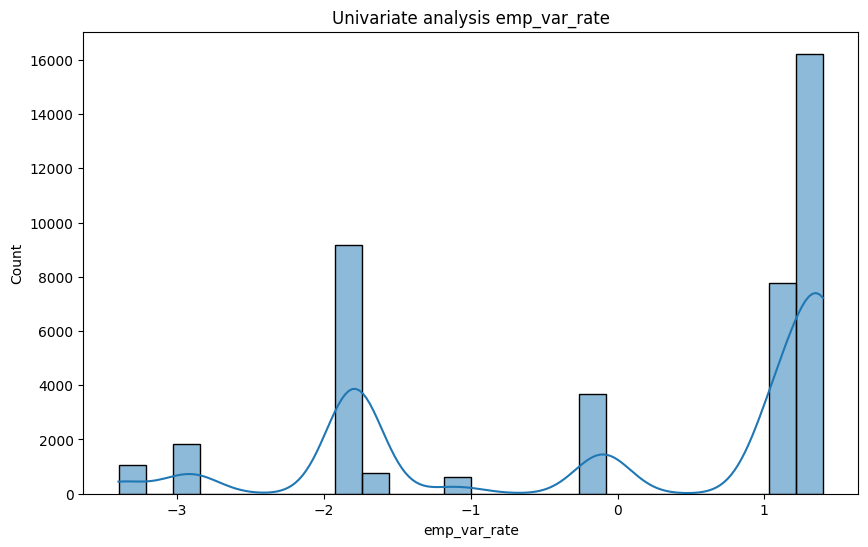

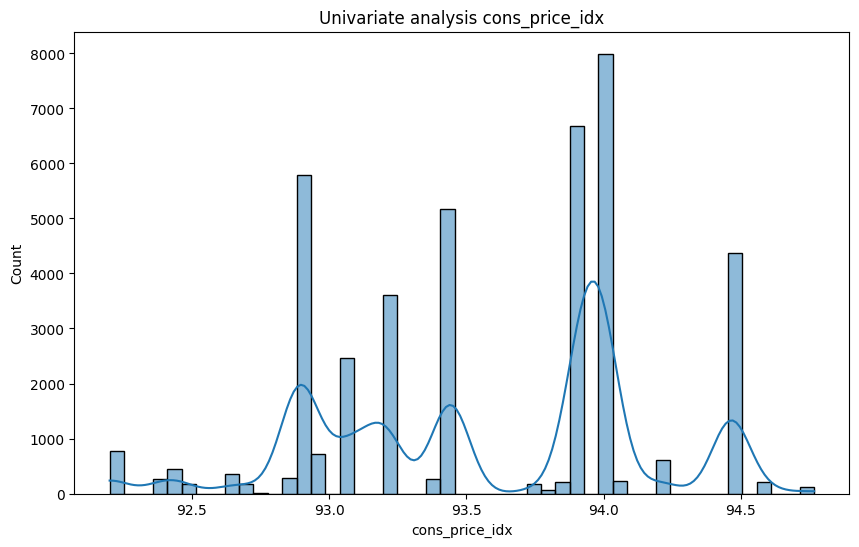

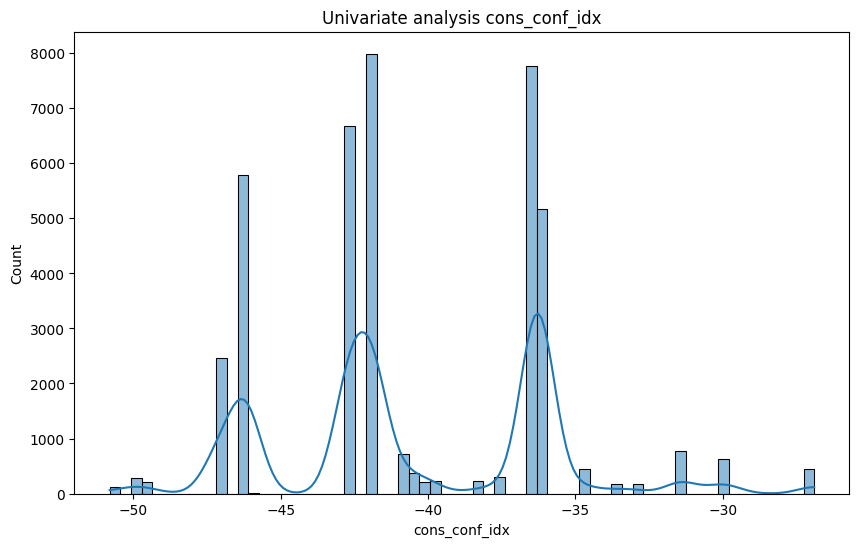

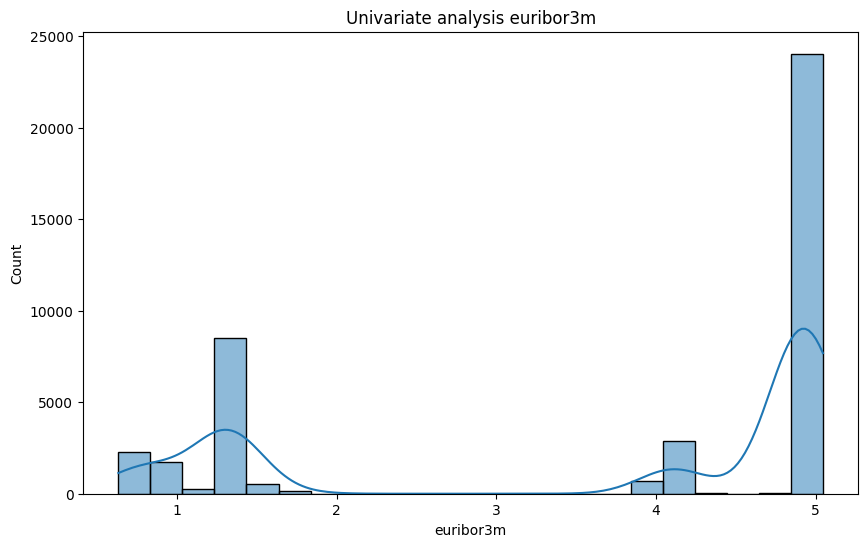

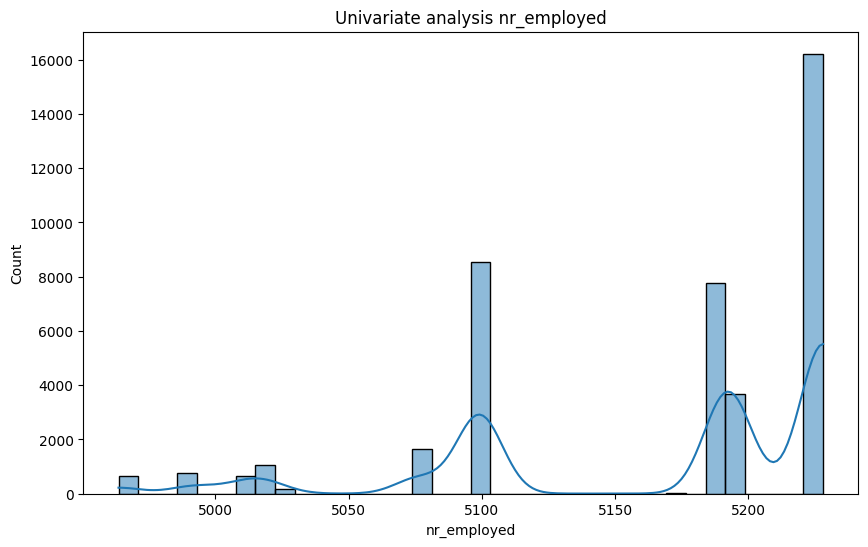

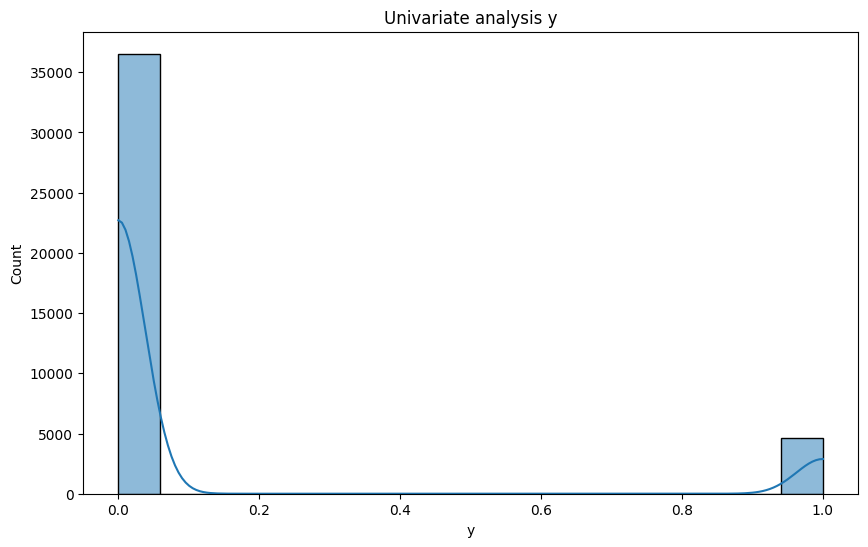

In [39]:
for col in num_features: 
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Univariate analysis {col}')
    plt.show()

In [40]:
# Observation :¶
# As we can see from the histogram, the features age, duration and campaign are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features.
# Looking at the plot for pdays, we can infer that majority of the customers were being contacted for the first time because as per the feature description for pdays the value 999 indicates that the customer had not been contacted previously.
# age duration and campaign are skewed towards right,
# we will compute the IQR and replace the outliers with the lower and upper boundaries

In [41]:
#Since pdays and previous consist majorly only of a single value,
#their variance is quite less and hence we can drop them since technically will be of no help in prediction.
df.drop(['pdays', 'previous'], axis=1, inplace=True)

### bivariate analysis on categorical data

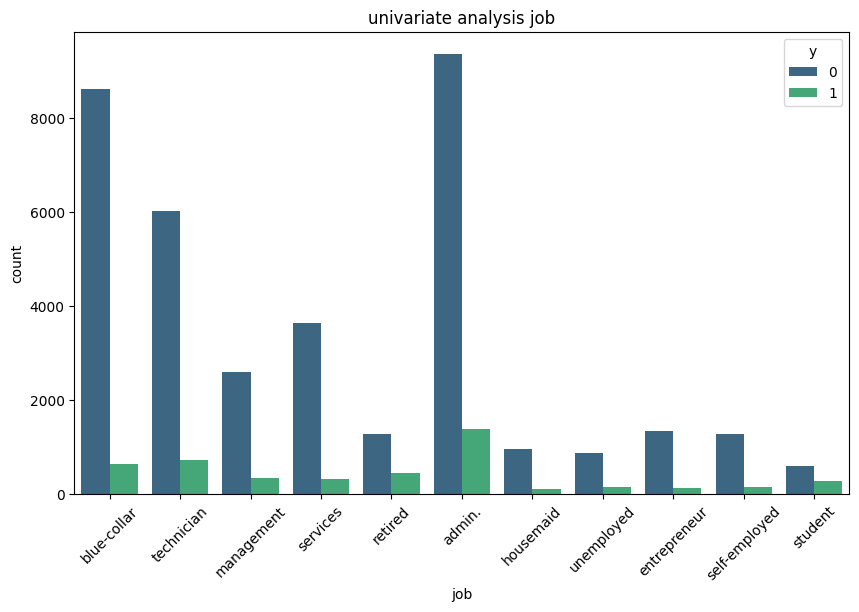

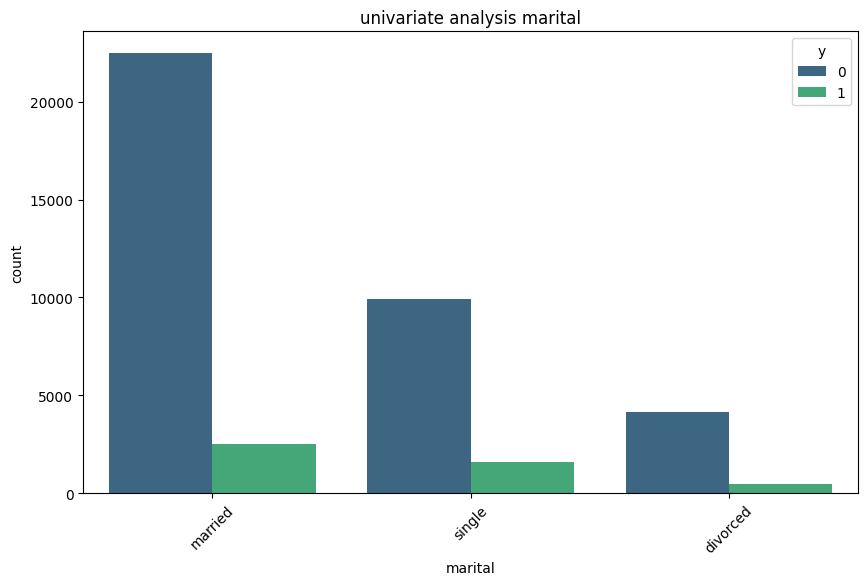

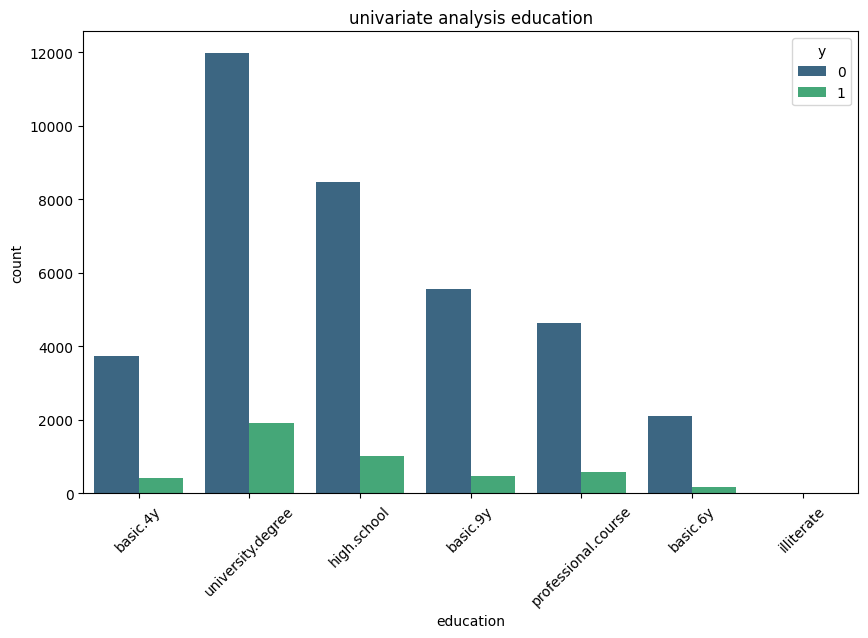

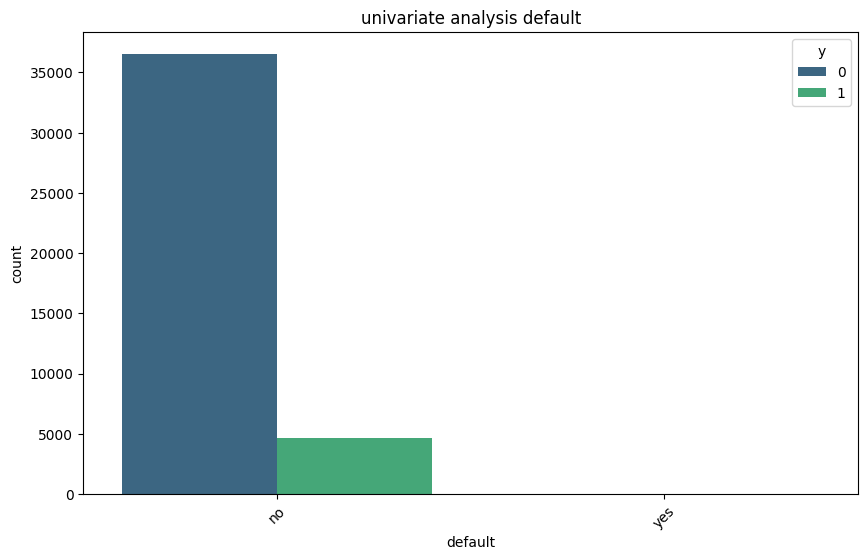

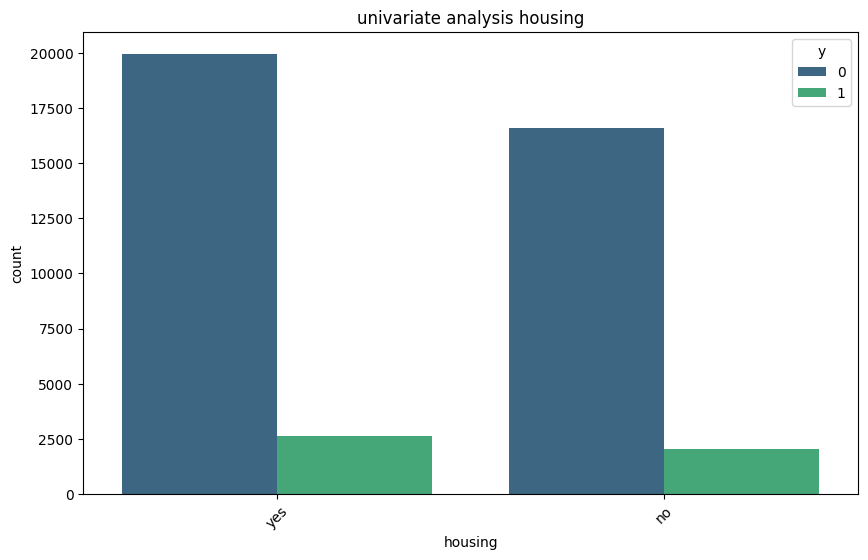

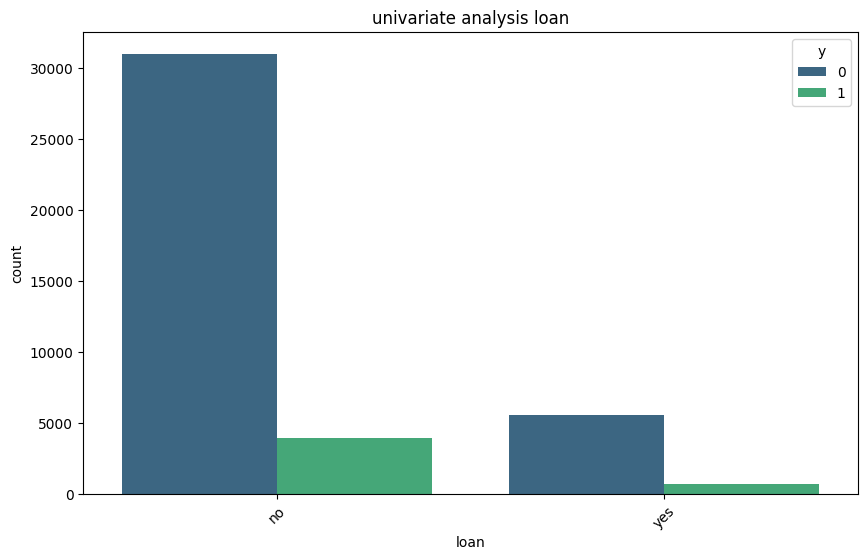

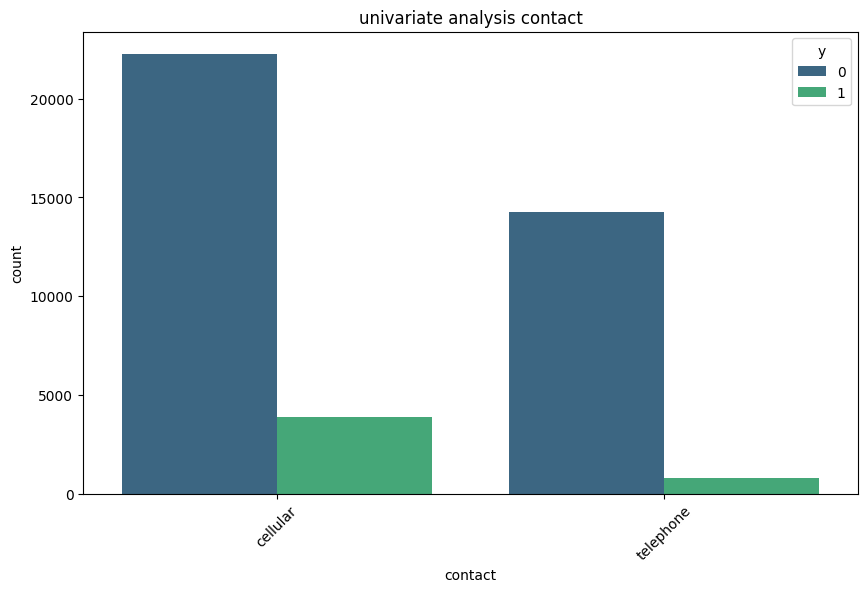

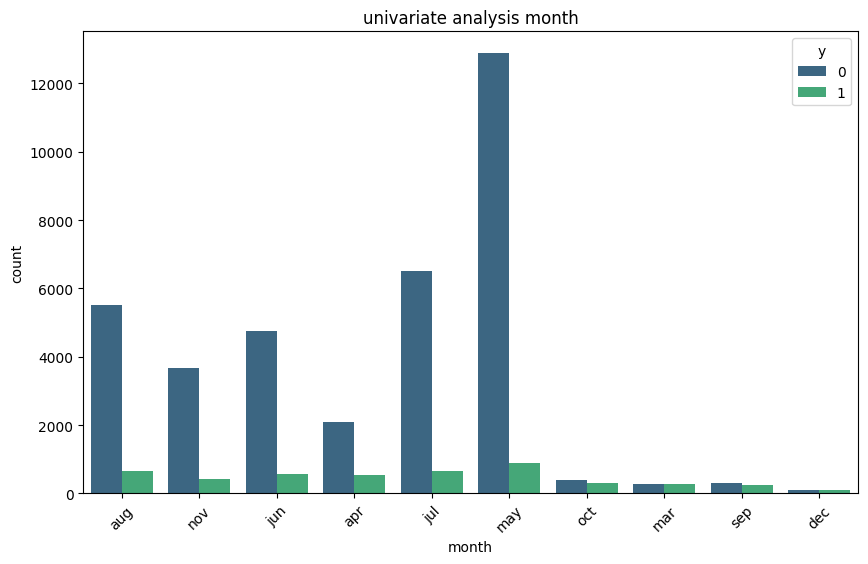

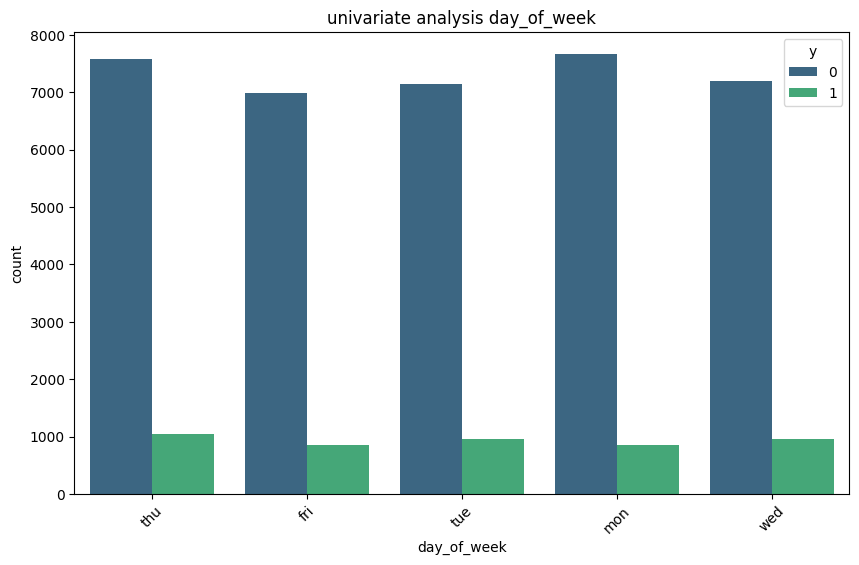

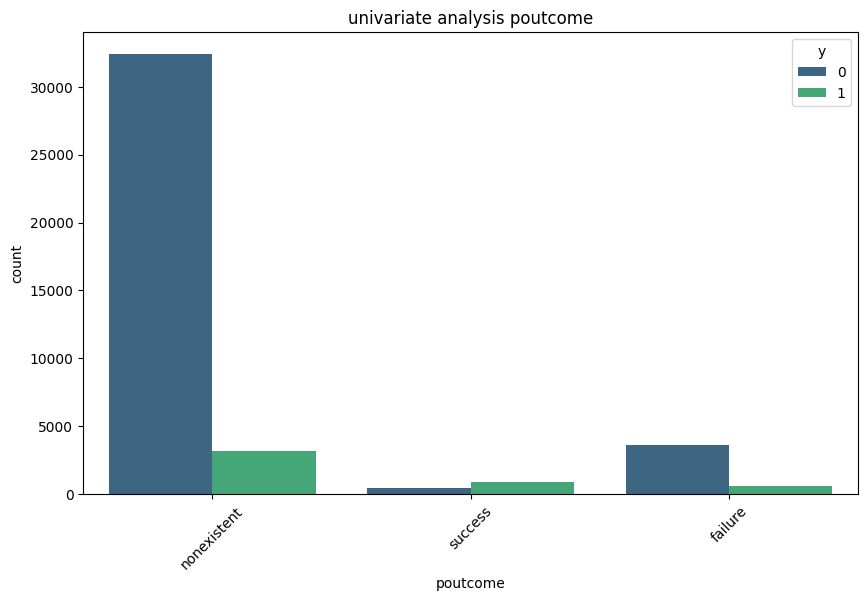

In [42]:
for col in cat_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col,data=df,hue='y',palette='viridis')
    plt.title(f"univariate analysis {col}")
    plt.xticks(rotation=45)
    plt.show()

In [43]:
# Observations:¶
# Customers having administrative jobs form the majority amongst those who have subscirbed to the term deposit.
# They are married
# They hold a university degree
# They do not hold a credit in default
# Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.
# Cell-phones should be the preferred mode of contact for contacting customers.

### Handling Outliers¶<br>
#### Outliers cause significant impact on the Mean and Variance.It becomes necessary to treat the outliers.


In [44]:
df.describe()

,age,duration,campaign,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


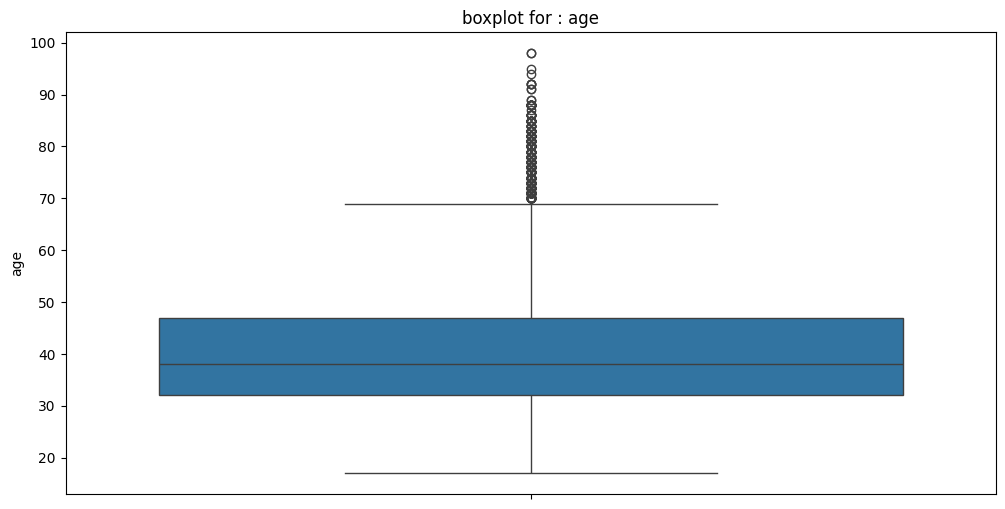

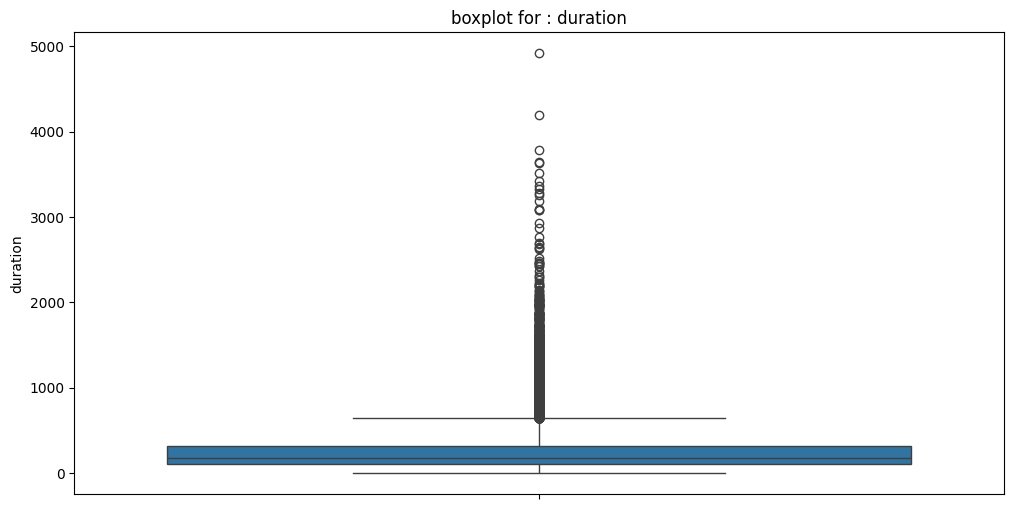

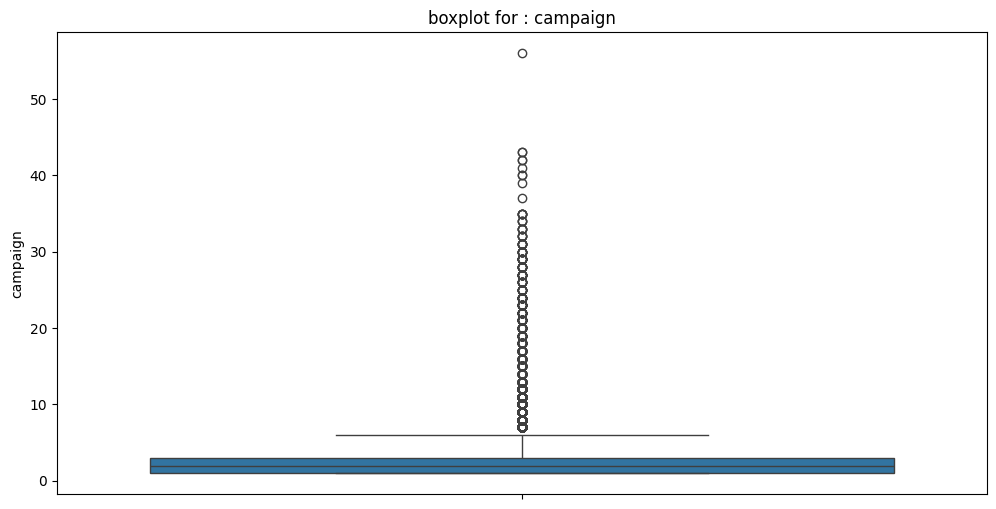

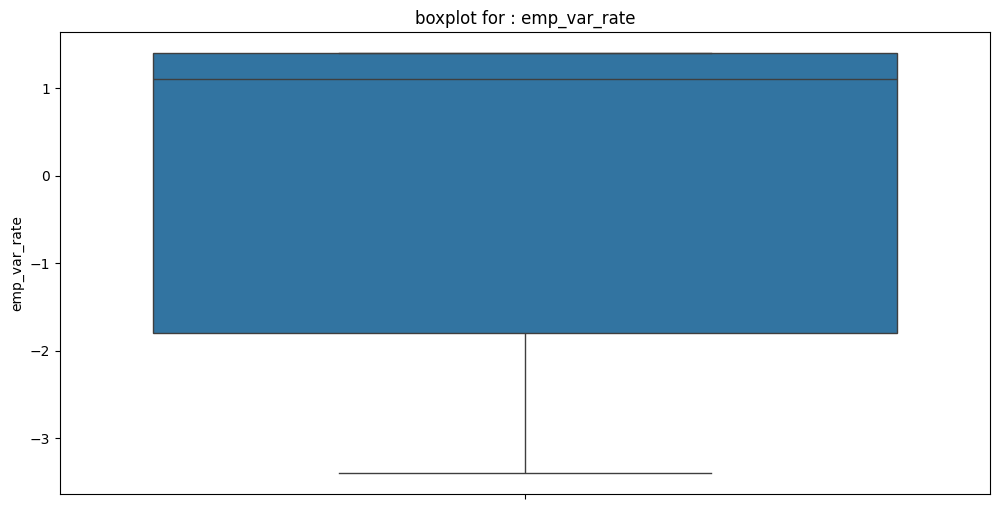

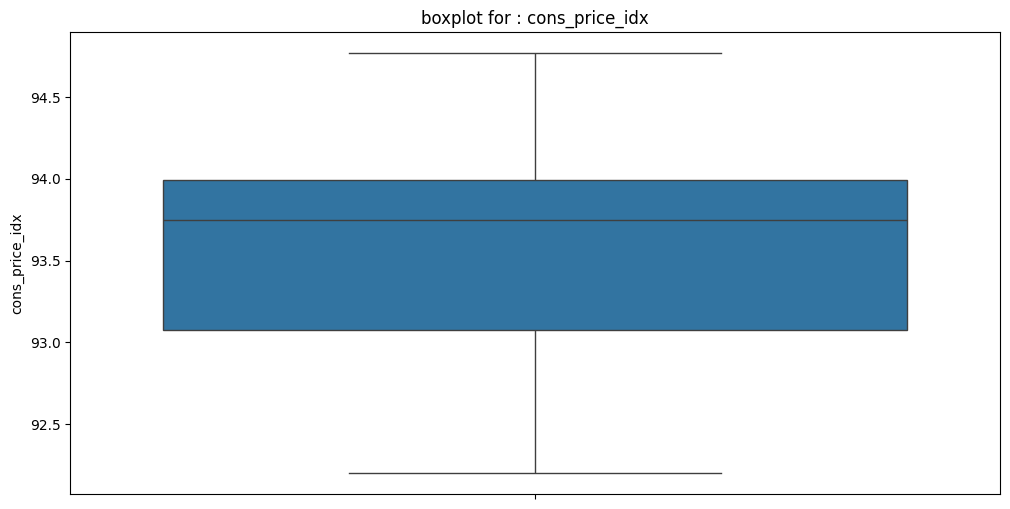

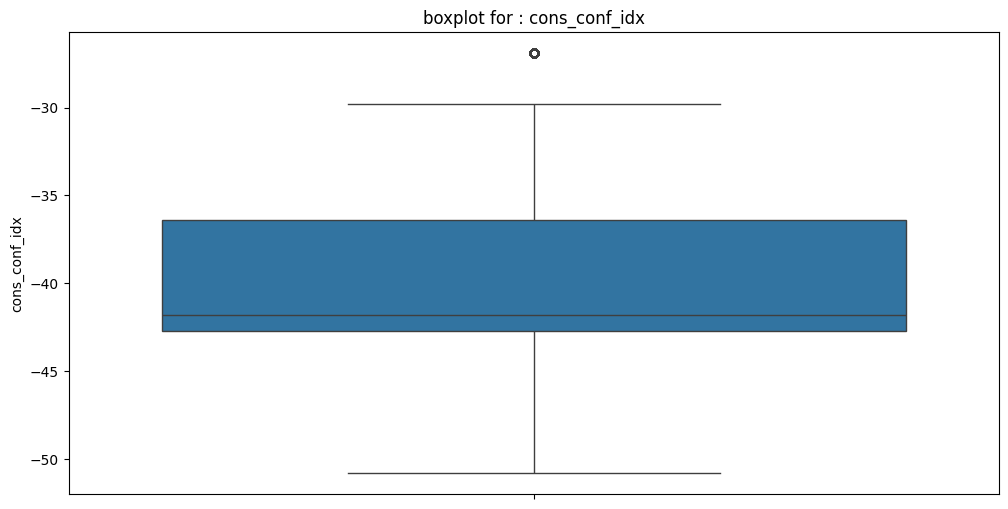

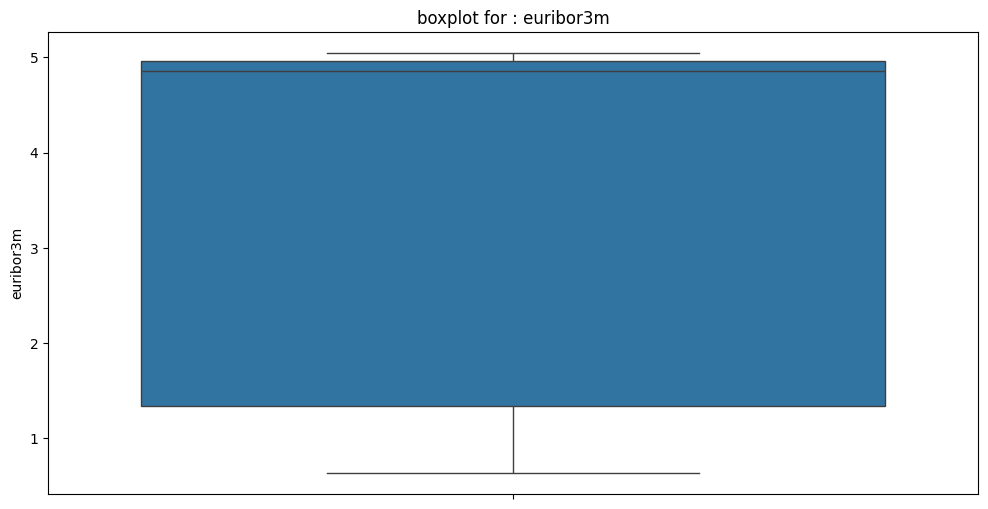

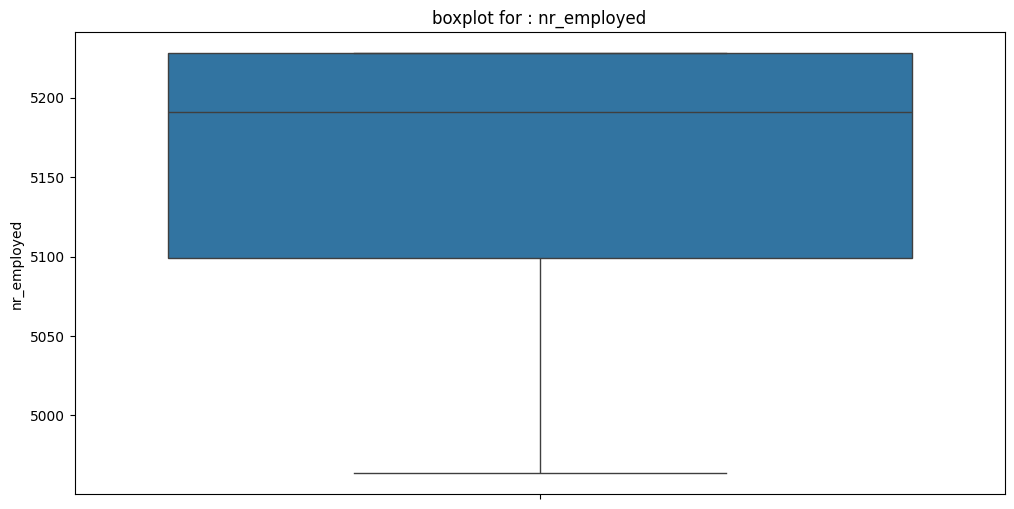

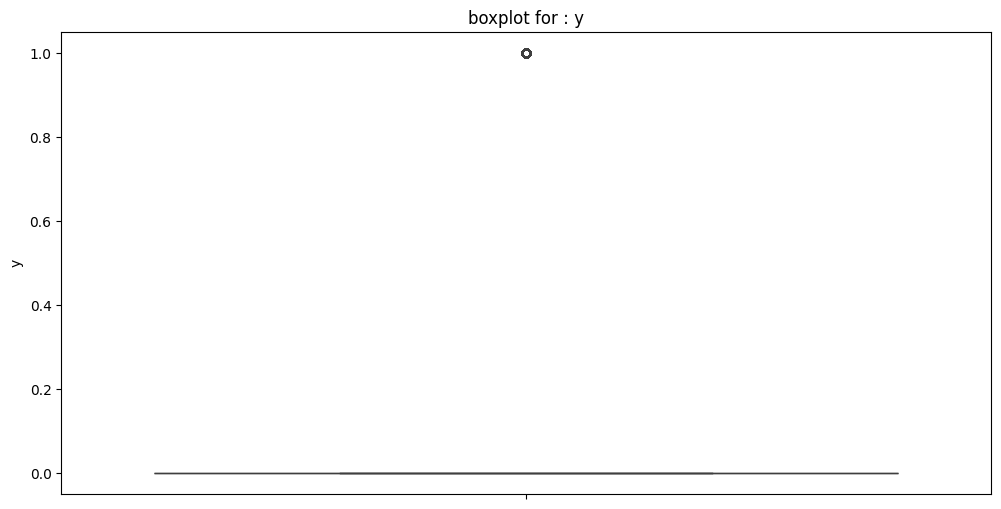

In [45]:
# age duration and campaign are skewed towards right,
# we will compute the IQR and replace the outliers with the lower and upper boundaries
num_features=df.select_dtypes(include=np.number).columns

for col in num_features: 
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df[col])
    plt.title(f'boxplot for : {col}')
    plt.show()

In [46]:
# age, duration,  campaign has outliers more: 
# cons_conf_idx has 1 outlier

In [47]:
outlier_having_feature=['age', 'duration', 'campaign', 'cons_conf_idx']

In [48]:
lower_boundries=[]
upper_boundries=[]

for i in outlier_having_feature: 
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_fence=df[i].quantile(0.25)-(IQR*1.5)
    upper_fence=df[i].quantile(0.75)+(IQR*1.5)

    print(f"for col: {i} : lower fence: {lower_fence}, upper fence: {upper_fence} ")
    lower_boundries.append(lower_fence)
    upper_boundries.append(upper_fence)

for col: age : lower fence: 9.5, upper fence: 69.5 
for col: duration : lower fence: -223.5, upper fence: 644.5 
for col: campaign : lower fence: -2.0, upper fence: 6.0 
for col: cons_conf_idx : lower fence: -52.150000000000006, upper fence: -26.949999999999992 


In [49]:
lower_boundries

[9.5, -223.5, -2.0, -52.150000000000006]

In [50]:
upper_boundries

[69.5, 644.5, 6.0, -26.949999999999992]

In [51]:
# for age lower boundry is 9.5 nd upper boundry 69.5

In [52]:
df[df['age']>69.5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
43,72,retired,divorced,basic.6y,no,yes,no,cellular,nov,wed,244,2,nonexistent,-3.4,92.649,-30.1,0.715,5017.5,1
307,74,retired,divorced,high.school,no,yes,yes,telephone,dec,mon,88,6,nonexistent,-3.0,92.713,-33.0,0.715,5023.5,0
334,80,retired,married,basic.4y,no,no,no,cellular,oct,tue,242,1,failure,-3.4,92.431,-26.9,0.742,5017.5,1
454,72,retired,married,high.school,no,no,no,cellular,nov,mon,257,1,nonexistent,-3.4,92.649,-30.1,0.714,5017.5,1
559,75,retired,divorced,basic.9y,no,no,no,cellular,mar,mon,233,1,nonexistent,-1.8,92.843,-50.0,1.560,5099.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40901,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,101,1,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,1
40905,76,retired,married,basic.4y,no,yes,no,cellular,sep,mon,136,1,failure,-1.1,94.199,-37.5,0.882,4963.6,0
40906,75,retired,divorced,basic.4y,no,no,no,cellular,apr,mon,227,4,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,1
41001,82,housemaid,married,basic.4y,no,no,no,telephone,sep,tue,279,3,success,-1.1,94.199,-37.5,0.877,4963.6,1


In [53]:
# # replace the all the outliers which is greater then upper boundary by upper boundary

j=0
for i in outlier_having_feature: 
    df.loc[df[i]>upper_boundries[j], i]=upper_boundries[j]
    j=j+1

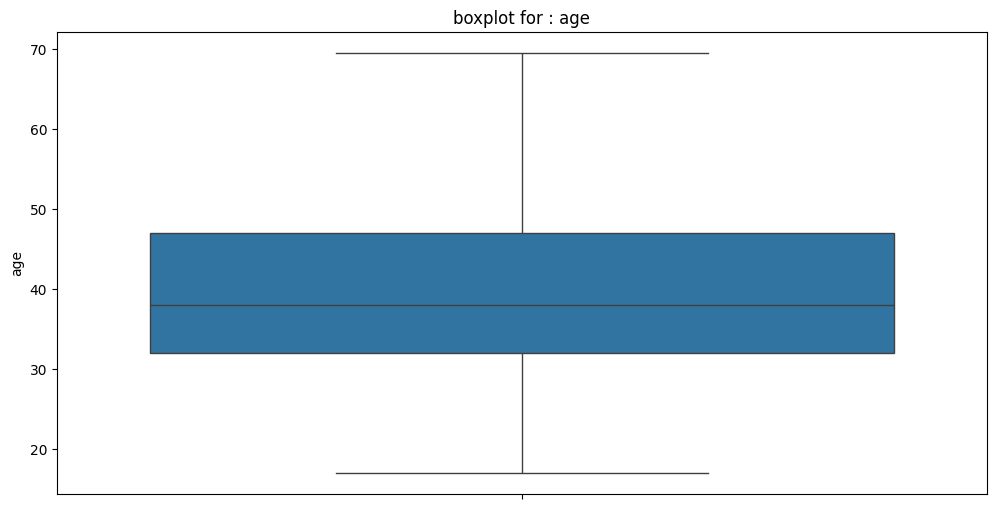

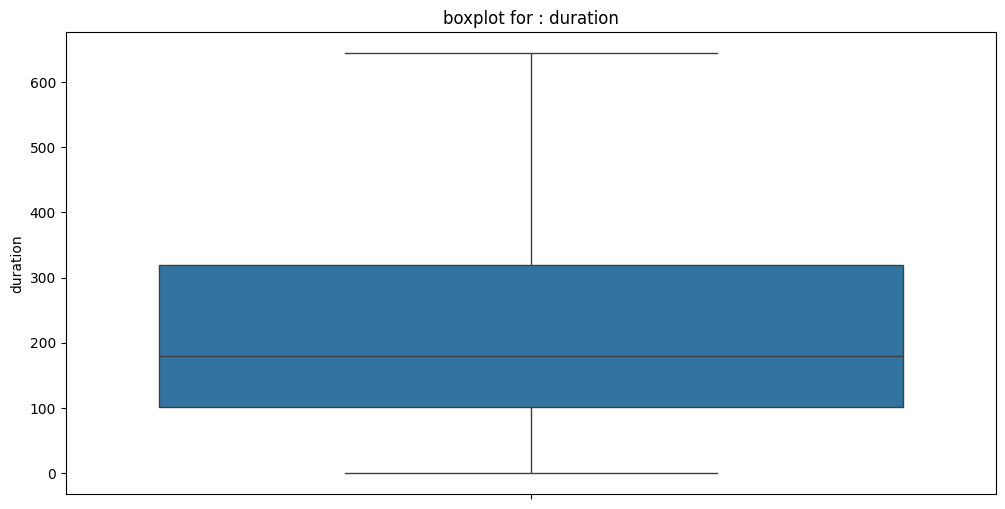

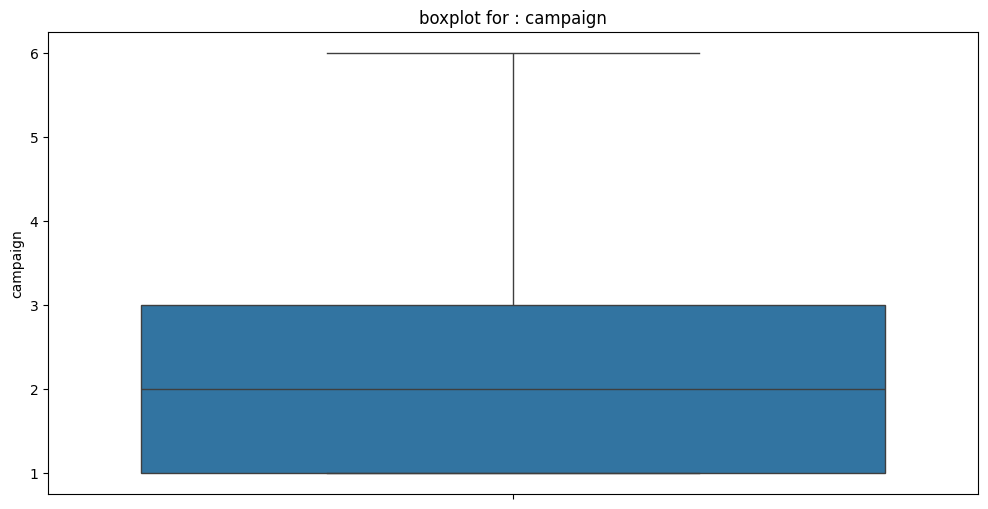

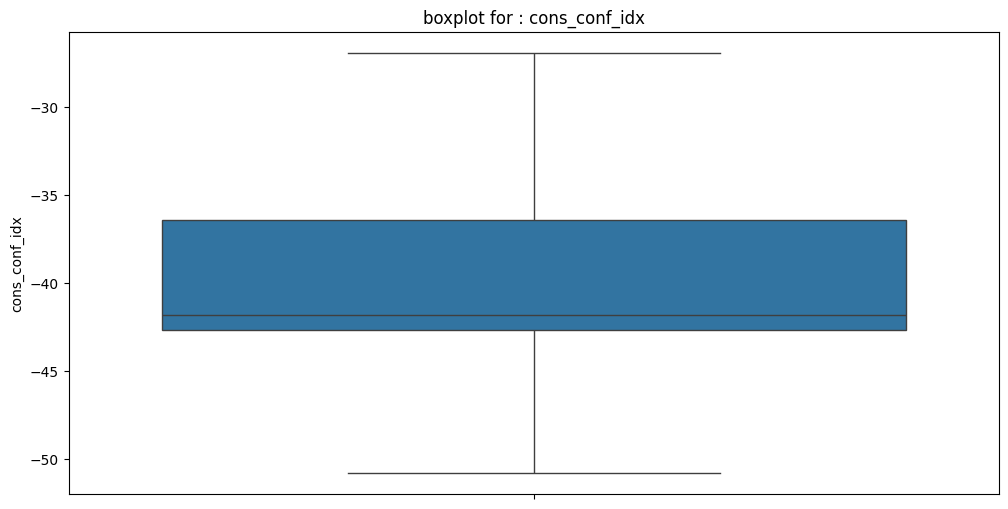

In [54]:

for col in ['age', 'duration', 'campaign', 'cons_conf_idx'] : 
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df[col])
    plt.title(f'boxplot for : {col}')
    plt.show()

In [55]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
3214,30.0,admin.,married,professional.course,no,yes,no,cellular,jun,thu,80.0,1,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,0
3954,31.0,blue-collar,single,basic.9y,no,yes,no,cellular,jul,wed,325.0,2,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0
7388,31.0,admin.,single,university.degree,no,no,no,cellular,aug,wed,582.0,4,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
9962,36.0,blue-collar,married,basic.9y,no,no,no,telephone,may,mon,98.0,4,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
21140,57.0,admin.,single,high.school,no,yes,no,cellular,aug,thu,479.0,1,nonexistent,-2.9,92.201,-31.4,0.873,5076.2,1
35414,44.0,blue-collar,married,basic.9y,no,yes,yes,cellular,may,tue,180.0,1,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,0
20140,36.0,blue-collar,single,basic.9y,no,no,no,telephone,may,tue,201.0,2,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
12250,45.0,student,single,university.degree,no,yes,no,cellular,oct,wed,316.0,2,failure,-1.1,94.601,-49.5,1.016,4963.6,0
5027,40.0,technician,married,basic.6y,no,yes,no,cellular,may,wed,156.0,5,failure,-1.8,92.893,-46.2,1.281,5099.1,0
25988,44.0,admin.,divorced,high.school,no,no,no,cellular,jul,tue,573.0,5,nonexistent,-2.9,92.469,-33.6,0.908,5076.2,1


In [56]:
# now there are no outliers
df.describe()

,age,duration,campaign,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,39.939236,235.021335,2.275476,0.081922,93.575720,-40.503405,3.621293,5167.034870,0.112663
std,10.128801,177.365635,1.550606,1.570883,0.578839,4.626271,1.734437,72.251364,0.316184
min,17.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,69.500000,644.500000,6.000000,1.400000,94.767000,-26.950000,5.045000,5228.100000,1.000000


In [57]:
#After replacing the outliers with the upper boundary, 
#the maximum values has been changed without impacting any other parameters like mean, standard deviation and quartiles.

Encoding Categorical Features¶: <br>
Machine learning algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values

In [58]:
cat_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [59]:
# check unique value in each feature: 
for col in cat_features: 
    print(f"unique values in {col} column is: {df[col].unique()}")

unique values in job column is: ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'student']
unique values in marital column is: ['married' 'single' 'divorced']
unique values in education column is: ['basic.4y' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
unique values in default column is: ['no' 'yes']
unique values in housing column is: ['yes' 'no']
unique values in loan column is: ['no' 'yes']
unique values in contact column is: ['cellular' 'telephone']
unique values in month column is: ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
unique values in day_of_week column is: ['thu' 'fri' 'tue' 'mon' 'wed']
unique values in poutcome column is: ['nonexistent' 'success' 'failure']


In [60]:
#Features like job, education, month, day_of_week  has so many categories, we will Label Encode them as One Hot Encoding would create so many columns
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

for col in cat_features: 
    df[col]=label_encoder.fit_transform(df[col])

In [61]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,0,1,0,0,1,2,210.0,1,1,1.4,93.444,-36.10,4.963,5228.1,0
1,53.0,9,1,6,0,0,0,0,7,0,138.0,1,1,-0.1,93.200,-42.00,4.021,5195.8,0
2,28.0,4,2,6,0,1,0,0,4,2,339.0,3,2,-1.7,94.055,-39.80,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,185.0,2,1,-1.8,93.075,-47.10,1.405,5099.1,0
4,55.0,5,1,0,0,1,0,0,1,0,137.0,1,2,-2.9,92.201,-31.40,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59.0,5,1,3,0,0,1,1,4,2,222.0,1,1,1.4,94.465,-41.80,4.866,5228.1,0
41184,31.0,3,1,0,0,0,0,1,6,2,196.0,2,1,1.1,93.994,-36.40,4.860,5191.0,0
41185,42.0,0,2,6,0,1,1,1,6,4,62.0,3,1,1.1,93.994,-36.40,4.857,5191.0,0
41186,48.0,9,1,5,0,0,1,1,8,3,200.0,2,1,-3.4,92.431,-26.95,0.742,5017.5,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  float64
 1   job             41176 non-null  int32  
 2   marital         41176 non-null  int32  
 3   education       41176 non-null  int32  
 4   default         41176 non-null  int32  
 5   housing         41176 non-null  int32  
 6   loan            41176 non-null  int32  
 7   contact         41176 non-null  int32  
 8   month           41176 non-null  int32  
 9   day_of_week     41176 non-null  int32  
 10  duration        41176 non-null  float64
 11  campaign        41176 non-null  int64  
 12  poutcome        41176 non-null  int32  
 13  emp_var_rate    41176 non-null  float64
 14  cons_price_idx  41176 non-null  float64
 15  cons_conf_idx   41176 non-null  float64
 16  euribor3m       41176 non-null  float64
 17  nr_employed     41176 non-null  floa

Seprating dependent and independant feature

In [63]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [64]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44.0,1,1,0,0,1,0,0,1,2,210.0,1,1,1.4,93.444,-36.10,4.963,5228.1
1,53.0,9,1,6,0,0,0,0,7,0,138.0,1,1,-0.1,93.200,-42.00,4.021,5195.8
2,28.0,4,2,6,0,1,0,0,4,2,339.0,3,2,-1.7,94.055,-39.80,0.729,4991.6
3,39.0,7,1,3,0,0,0,0,0,0,185.0,2,1,-1.8,93.075,-47.10,1.405,5099.1
4,55.0,5,1,0,0,1,0,0,1,0,137.0,1,2,-2.9,92.201,-31.40,0.869,5076.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59.0,5,1,3,0,0,1,1,4,2,222.0,1,1,1.4,94.465,-41.80,4.866,5228.1
41184,31.0,3,1,0,0,0,0,1,6,2,196.0,2,1,1.1,93.994,-36.40,4.860,5191.0
41185,42.0,0,2,6,0,1,1,1,6,4,62.0,3,1,1.1,93.994,-36.40,4.857,5191.0
41186,48.0,9,1,5,0,0,1,1,8,3,200.0,2,1,-3.4,92.431,-26.95,0.742,5017.5


In [65]:
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41176, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.10, random_state=1)

In [67]:
X_train.shape, X_test.shape

((37058, 18), (4118, 18))

In [68]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
14347,49.0,0,1,3,0,1,1,0,1,3,120.0,4,1,1.4,93.444,-36.1,4.963,5228.1
27932,33.0,6,2,3,0,0,0,0,6,3,141.0,1,1,-1.8,92.893,-46.2,1.291,5099.1
35130,35.0,0,1,6,0,0,0,0,3,3,105.0,2,1,1.4,93.918,-42.7,4.961,5228.1
119,29.0,7,2,3,0,0,0,1,4,1,123.0,2,1,1.4,94.465,-41.8,4.958,5228.1
16525,30.0,6,2,6,0,1,0,0,7,2,88.0,1,0,-0.1,93.200,-42.0,4.076,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,34.0,0,2,6,0,1,0,0,1,2,259.0,3,1,1.4,93.444,-36.1,4.968,5228.1
32518,31.0,6,2,6,0,1,0,0,3,0,85.0,2,1,1.4,93.918,-42.7,4.957,5228.1
5192,30.0,10,1,5,0,1,1,0,4,3,495.0,1,1,-2.9,92.963,-40.8,1.262,5076.2
12172,52.0,6,0,2,0,1,0,0,7,2,26.0,5,0,-0.1,93.200,-42.0,4.076,5195.8


cheak correlation 

<Axes: >

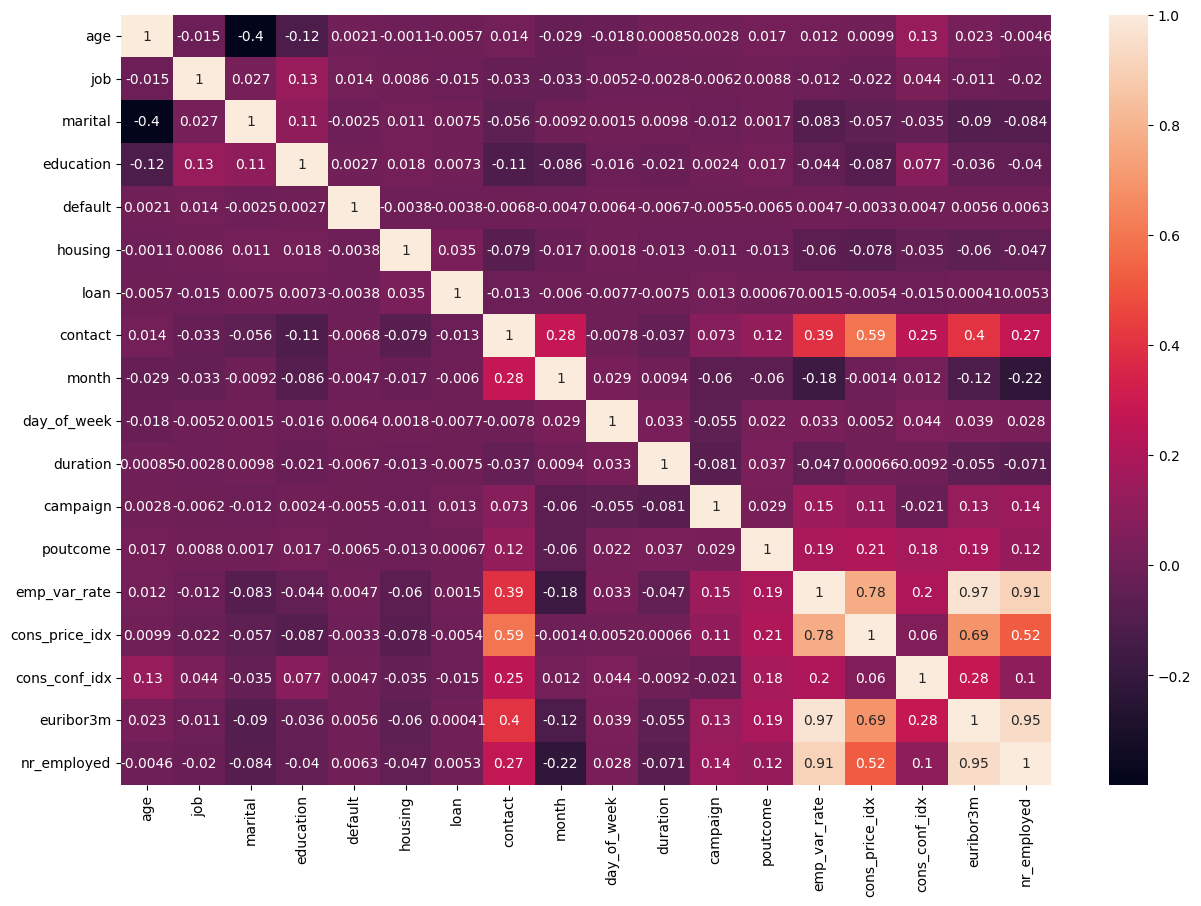

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot= True)

In [70]:
#There some feature that are highly correlated and inversely correlated.
#  If we had, we could have written the condition that if the correlation is higher than 0.8 (or can be any threshold value depending on the domain knowledge) 
# and less than -0.8, we could have drop those features. Because those correlated features would have been doing the same job.

# nr_employed vs emp_var_rate

In [71]:
def correlation(dataset, threshold): 
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)): 
        for j in range(i): 
            if abs(corr_matrix.iloc[i,j])>threshold: 
                colname=corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr


In [72]:
corr_features=correlation(X_train, 0.9)
# this process only for X_train not for the X_test (for reduce the overfitting)

In [73]:
corr_features
# there are 2 feature>> drop from both X_train and X_test

{'euribor3m', 'nr_employed'}

In [74]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [75]:
X_train.shape, X_test.shape

((37058, 16), (4118, 16))

<Axes: >

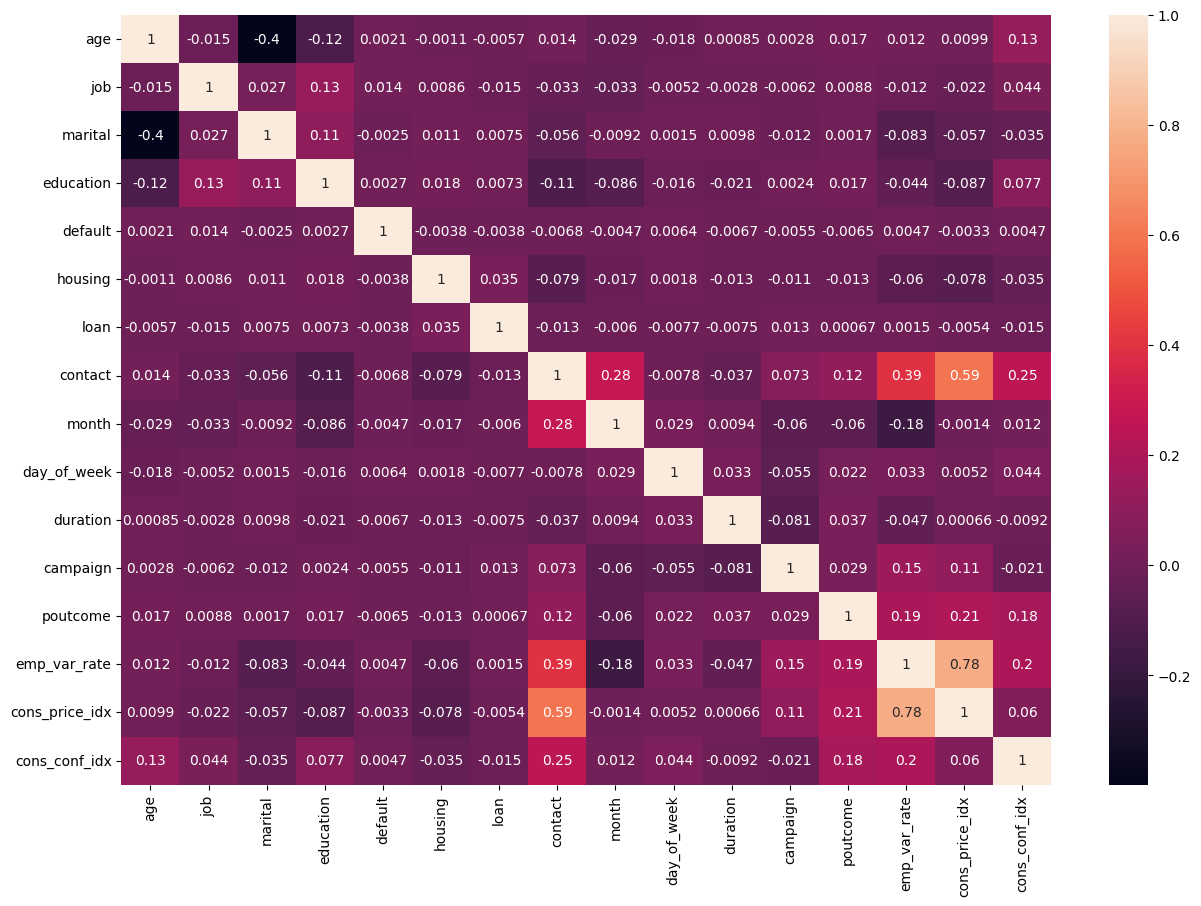

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot= True)

In [77]:
# now, There are no features that are highly correlated and inversely correlated

### Handling imbalanced dataset: <br>
#### Since the class distribution in the target variable is ~89:11 indicating an imbalance dataset, we need to resample it.

SMOTE()

In [78]:
y_train.value_counts()

y
0    32873
1     4185
Name: count, dtype: int64

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
oversample=SMOTE()

In [81]:
oversample

SMOTE()

In [82]:
X_train_sm, y_train_sm=oversample.fit_resample(X_train, y_train)

In [83]:
X_train_sm.shape, y_train_sm.shape

((65746, 16), (65746,))

In [84]:
y_train_sm.value_counts()

y
0    32873
1    32873
Name: count, dtype: int64

In [85]:
from collections import Counter
counter = Counter(y_train_sm)
print('After', counter)

After Counter({0: 32873, 1: 32873})


### Grid Serch CV and hyperparameter tuning

### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [87]:
print(10.0**np.arange(-2,3))

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [88]:
params={'penalty': ('l1', 'l2', 'elasticnet'), 'C':10.0**np.arange(-2,3)}
# 5*3=15 combinaiton

In [89]:
classifier=LogisticRegression()

In [90]:
classifier

LogisticRegression()

In [91]:
# defining stratified Kfold cross validation
cv= StratifiedKFold(n_splits=5)

In [92]:
cv

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [93]:
clf=GridSearchCV(classifier, param_grid=params, cv=cv)

In [94]:
clf

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ('l1', 'l2', 'elasticnet')})

In [95]:
clf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ('l1', 'l2', 'elasticnet')})

In [96]:
clf.best_score_

0.8592009940468806

In [97]:
clf.best_params_

{'C': 100.0, 'penalty': 'l2'}

In [107]:
model=LogisticRegression(C=100, penalty='l2')

In [108]:
model

LogisticRegression(C=100)

In [109]:
model.fit(X_train_sm, y_train_sm)

LogisticRegression(C=100)

In [110]:
y_pred=model.predict(X_test)

In [111]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
# model performance

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3074  590]
 [  97  357]]
0.8331714424477902
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3664
           1       0.38      0.79      0.51       454

    accuracy                           0.83      4118
   macro avg       0.67      0.81      0.70      4118
weighted avg       0.90      0.83      0.86      4118



<Axes: >

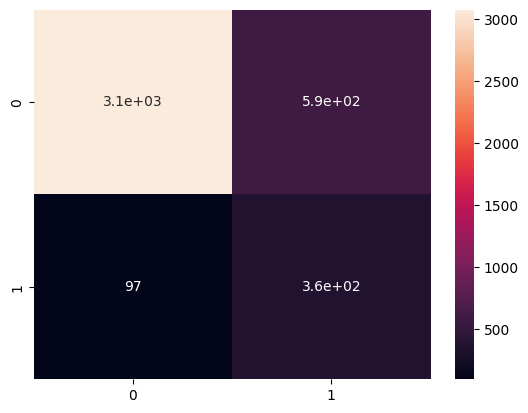

In [118]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [114]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))